In [1]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns
import datetime
from datetime import date


In [2]:
teis_df = pd.read_excel('../data/BDI3 All Evals for NSS 11-2023.xlsx')

In [3]:
teis_df.head(10)

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Code 1,Code 2,Code 3,Code 4,Code 5,Code 6,Code 7,Code 8,Code 9,Code 10
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,54340,M,2021-06-22,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,54344,F,2022-03-07,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,54515,M,2021-11-04,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,1990-09-01 00:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,54584,M,2020-06-05,Northwest,BDI-3 Eligibility Evaluation,17.0,91.0,27,85-99,79/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,54861,F,2020-07-21,Memphis Delta,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,71/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,54937,F,2022-03-09,Southeast Tennessee,BDI-3 Eligibility Evaluation,11.0,105.0,63,94-114,96/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,55077,F,2020-11-23,First Tennessee,BDI-3 Eligibility Evaluation,7.0,61.0,1,56-70,21/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,55182,F,2022-07-06,Upper Cumberland,BDI-3 Eligibility Evaluation,10.0,100.0,50,90-110,91/90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
teis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23947 entries, 0 to 23946
Columns: 219 entries, Child ID to Code 10
dtypes: datetime64[ns](14), float64(79), object(126)
memory usage: 40.0+ MB


Cleaning the Dataset

In [5]:
nan_count = teis_df.isna().sum()
print(nan_count)

Child ID                      0
Gender                        0
Date of Birth                 0
Location - Sub Level 1      132
Program Label                 0
                          ...  
Code 6                    23947
Code 7                    23947
Code 8                    23947
Code 9                    23947
Code 10                   23947
Length: 219, dtype: int64


In [6]:
##This code will drop the 'Code' columns because they are all NaN
teis_dropped_df = teis_df.drop(columns = ['Code 1', 'Code 2', 'Code 3', 'Code 4', 'Code 5',
                                'Code 6', 'Code 7', 'Code 8', 'Code 9', 'Code 10'])
teis_dropped_df

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Cognitive-Perception and Concepts RS,Cognitive-Perception and Concepts SS,Cognitive-Perception and Concepts PR,Cognitive-Perception and Concepts AE,Cognitive-Perception and Concepts RDI,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,9.0,13.0,84,12,98/90,411.0,392 - 431,1,60.0,71
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,11.0,7.0,16,18,29/90,437.0,421 - 453,– 1.00,40.0,29
2,54340,M,2021-06-22,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,10.0,7.0,16,15,37/90,426.0,408 - 444,– 1.00,40.0,29
3,54344,F,2022-03-07,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,9.0,10.0,50,12,92/90,411.0,392 - 431,0,50.0,50
4,54515,M,2021-11-04,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,1990-09-01 00:00:00,...,10.0,10.0,50,15,88/90,426.0,408 - 444,0,50.0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23942,SP03287,F,2023-09-25,Memphis Delta,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,6.0,15.0,95,6,>99/90,378.0,365 - 391,1.67,67.0,85
23943,SP03288,F,2021-05-18,South Central,BDI-3 Eligibility Evaluation,25.0,115.0,84,107-121,96/90,...,20.0,14.0,91,37,99/90,499.0,491 - 508,1.33,63.0,78
23944,SP03289,F,2021-10-31,South Central,BDI-3 Eligibility Evaluation,21.0,103.0,58,96-110,92/90,...,13.0,10.0,50,25,89/90,464.0,450 - 479,0,50.0,50
23945,SP03290,M,2020-03-25,Memphis Delta,BDI-3 Annual Evaluation,16.0,88.0,21,82-96,66/90,...,23.0,9.0,37,40,75/90,507.0,500 - 515,– 0.33,47.0,43


In [7]:
##Dropping duplicates
teis_no_duped = teis_dropped_df.drop_duplicates(subset=teis_dropped_df.columns.difference(['Child ID']))
teis_no_duped

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Cognitive-Perception and Concepts RS,Cognitive-Perception and Concepts SS,Cognitive-Perception and Concepts PR,Cognitive-Perception and Concepts AE,Cognitive-Perception and Concepts RDI,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,9.0,13.0,84,12,98/90,411.0,392 - 431,1,60.0,71
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,11.0,7.0,16,18,29/90,437.0,421 - 453,– 1.00,40.0,29
2,54340,M,2021-06-22,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,10.0,7.0,16,15,37/90,426.0,408 - 444,– 1.00,40.0,29
3,54344,F,2022-03-07,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,9.0,10.0,50,12,92/90,411.0,392 - 431,0,50.0,50
4,54515,M,2021-11-04,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,1990-09-01 00:00:00,...,10.0,10.0,50,15,88/90,426.0,408 - 444,0,50.0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23942,SP03287,F,2023-09-25,Memphis Delta,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,6.0,15.0,95,6,>99/90,378.0,365 - 391,1.67,67.0,85
23943,SP03288,F,2021-05-18,South Central,BDI-3 Eligibility Evaluation,25.0,115.0,84,107-121,96/90,...,20.0,14.0,91,37,99/90,499.0,491 - 508,1.33,63.0,78
23944,SP03289,F,2021-10-31,South Central,BDI-3 Eligibility Evaluation,21.0,103.0,58,96-110,92/90,...,13.0,10.0,50,25,89/90,464.0,450 - 479,0,50.0,50
23945,SP03290,M,2020-03-25,Memphis Delta,BDI-3 Annual Evaluation,16.0,88.0,21,82-96,66/90,...,23.0,9.0,37,40,75/90,507.0,500 - 515,– 0.33,47.0,43


This section will clean the datetime issue in the RDI columns

In [8]:
#This finds all colums with 'RDI' in the title
rdi_cols = teis_no_duped.columns.str.contains(r'\sRDI')

In [9]:
rdi_cols

array([False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,

In [10]:
teis_no_duped.iloc[:,rdi_cols]

,Adaptive RDI,Social-Emotional RDI,Communication RDI,Motor RDI,Cognitive RDI,Adaptive-Self Care RDI,Adaptive-Personal Responsibility RDI,Social Emotional-Adult Interaction RDI,Social Emotional-Peer Interaction RDI,Social Emotional-Self Concept / Social Role RDI,Communication-Receptive Communication RDI,Communication-Expressive Communication RDI,Motor-Gross Motor RDI,Motor-Fine Motor RDI,Motor-Perceptual Motor RDI,Cognitive-Attention and Memory RDI,Cognitive-Reasoning / Academic Skills RDI,Cognitive-Perception and Concepts RDI
0,39/90,98/90,79/90,66/90,89/90,39/90,NaN,98/90,NaN,98/90,75/90,81/90,37/90,85/90,NaN,50/90,NaN,98/90
1,79/90,93/90,82/90,91/90,82/90,66/90,87/90,97/90,82/90,95/90,85/90,77/90,61/90,97/90,95/90,82/90,98/90,29/90
2,77/90,81/90,45/90,96/90,50/90,77/90,NaN,94/90,NaN,53/90,34/90,55/90,95/90,96/90,NaN,66/90,NaN,37/90
3,99/90,93/90,66/90,63/90,96/90,99/90,NaN,92/90,NaN,95/90,73/90,61/90,1990-10-01 00:00:00,96/90,NaN,98/90,NaN,92/90
4,1990-09-01 00:00:00,34/90,15/90,15/90,85/90,1990-09-01 00:00:00,NaN,25/90,NaN,42/90,16/90,13/90,1990-01-01 00:00:00,75/90,NaN,82/90,NaN,88/90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23942,99/90,98/90,96/90,99/90,98/90,99/90,NaN,98/90,NaN,98/90,96/90,95/90,97/90,NaN,NaN,82/90,NaN,>99/90
23943,96/90,97/90,96/90,98/90,98/90,88/90,99/90,96/90,97/90,97/90,99/90,88/90,99/90,96/90,98/90,96/90,98/90,99/90
23944,92/90,91/90,1990-02-01 00:00:00,93/90,88/90,91/90,93/90,97/90,92/90,77/90,1990-05-01 00:00:00,1990-01-01 00:00:00,93/90,90/90,95/90,87/90,89/90,89/90
23945,66/90,66/90,34/90,91/90,61/90,34/90,88/90,55/90,93/90,34/90,39/90,27/90,81/90,91/90,96/90,29/90,75/90,75/90


In [11]:
type(teis_no_duped['Adaptive RDI'][3])

str

In [12]:
##This function will take in a value if it is a datetime object and return the corrected rdi value
def fix_rdi(object):
    if isinstance(object, datetime.datetime): 
        return f'{object.month}/90'
    else:
        return object

In [13]:
fix_rdi(teis_no_duped['Adaptive RDI'][4])

'9/90'

In [14]:
#This creates a new dataframe and fix the datetime objects in the 'RDI' columns
teis_rdi_fixed = pd.DataFrame()
for i in teis_no_duped.columns:
    if 'RDI' in i:
        teis_rdi_fixed[i] = teis_no_duped[i].apply(fix_rdi)
    else: teis_rdi_fixed[i] = teis_no_duped[i]

C:\Users\sstar\AppData\Local\Temp\ipykernel_34004\3026620737.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  else: teis_rdi_fixed[i] = teis_no_duped[i]
C:\Users\sstar\AppData\Local\Temp\ipykernel_34004\3026620737.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  else: teis_rdi_fixed[i] = teis_no_duped[i]
C:\Users\sstar\AppData\Local\Temp\ipykernel_34004\3026620737.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider

In [15]:
teis_rdi_fixed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18708 entries, 0 to 23946
Columns: 209 entries, Child ID to Cognitive-Perception and Concepts NCE
dtypes: datetime64[ns](14), float64(69), object(126)
memory usage: 30.5+ MB


EDA begins here

Age:

In [16]:
#This function will take in a date and return the age of the child at test
def calculate_age(born, test):
        return test.year - born.year - ((test.month, test.day) < (born.month, born.day))

In [17]:
teis_rdi_fixed['Age of Testing'] = teis_rdi_fixed.apply(lambda x: calculate_age(x['Date of Birth'], x['Adaptive-Self Care Date of Testing']), axis = 1)

In [18]:
teis_rdi_fixed

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Cognitive-Perception and Concepts SS,Cognitive-Perception and Concepts PR,Cognitive-Perception and Concepts AE,Cognitive-Perception and Concepts RDI,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE,Age of Testing
0,44879,F,2022-09-27,Southwest,BDI-3 Eligibility Evaluation,7.0,85.0,16,77-97,39/90,...,13.0,84,12,98/90,411.0,392 - 431,1,60.0,71,0.0
1,47795,F,2020-12-23,Greater Nashville,BDI-3 Eligibility Evaluation,16.0,88.0,21,82-96,79/90,...,7.0,16,18,29/90,437.0,421 - 453,– 1.00,40.0,29,2.0
2,54340,M,2021-06-22,First Tennessee,BDI-3 Eligibility Evaluation,8.0,90.0,25,81-101,77/90,...,7.0,16,15,37/90,426.0,408 - 444,– 1.00,40.0,29,1.0
3,54344,F,2022-03-07,Southeast Tennessee,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,10.0,50,12,92/90,411.0,392 - 431,0,50.0,50,0.0
4,54515,M,2021-11-04,Memphis Delta,BDI-3 Eligibility Evaluation,5.0,75.0,5,68-88,9/90,...,10.0,50,15,88/90,426.0,408 - 444,0,50.0,50,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23942,SP03287,F,2023-09-25,Memphis Delta,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,15.0,95,6,>99/90,378.0,365 - 391,1.67,67.0,85,0.0
23943,SP03288,F,2021-05-18,South Central,BDI-3 Eligibility Evaluation,25.0,115.0,84,107-121,96/90,...,14.0,91,37,99/90,499.0,491 - 508,1.33,63.0,78,2.0
23944,SP03289,F,2021-10-31,South Central,BDI-3 Eligibility Evaluation,21.0,103.0,58,96-110,92/90,...,10.0,50,25,89/90,464.0,450 - 479,0,50.0,50,2.0
23945,SP03290,M,2020-03-25,Memphis Delta,BDI-3 Annual Evaluation,16.0,88.0,21,82-96,66/90,...,9.0,37,40,75/90,507.0,500 - 515,– 0.33,47.0,43,3.0


In [19]:
teis_rdi_fixed.value_counts('Age of Testing')

Age of Testing
2.0    8166
1.0    5842
0.0    3748
3.0     945
4.0       1
dtype: int64

DQ:

In [20]:
#This will return the columns with 'Developmental Quotient' in the title
dq_cols = teis_rdi_fixed.columns.str.contains(r'\sDevelopmental Quotient')

In [21]:
dq_cols

array([False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [22]:
dq_df = teis_rdi_fixed.iloc[:,dq_cols]

In [23]:
dq_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18708 entries, 0 to 23946
Data columns (total 6 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Adaptive Developmental Quotient          18701 non-null  float64
 1   Social-Emotional Developmental Quotient  18694 non-null  float64
 2   Communication Developmental Quotient     18680 non-null  float64
 3   Motor Developmental Quotient             18682 non-null  float64
 4   Cognitive Developmental Quotient         18691 non-null  float64
 5   BDI-3 Total Developmental Quotient       18656 non-null  float64
dtypes: float64(6)
memory usage: 1.5 MB


In [24]:
df2 = dq_df.mean()
print("Get mean of entire DataFrame:\n", df2)

Get mean of entire DataFrame:
 Adaptive Developmental Quotient            87.631303
Social-Emotional Developmental Quotient    94.601423
Communication Developmental Quotient       79.679497
Motor Developmental Quotient               94.658174
Cognitive Developmental Quotient           89.177412
BDI-3 Total Developmental Quotient         87.819897
dtype: float64


Reamining NaNs:

In [25]:
nan_count_cleaned = teis_rdi_fixed.isna().sum()
print(nan_count_cleaned)

Child ID                                      0
Gender                                        0
Date of Birth                                 0
Location - Sub Level 1                       69
Program Label                                 0
                                             ..
Cognitive-Perception and Concepts CSS 90%    16
Cognitive-Perception and Concepts Z-Score    16
Cognitive-Perception and Concepts T-Score    16
Cognitive-Perception and Concepts NCE        16
Age of Testing                                6
Length: 210, dtype: int64


Evaluators:

In [26]:
teis_rdi_fixed.value_counts('Adaptive-Self Care Examiner')

Adaptive-Self Care Examiner
Tracey Hardiman    415
Emily Williams     373
Kelly Bryan        371
Tara Herrell       367
Candice Padilla    362
                  ... 
Karie Quick          2
Amanda Harris        2
Sara Turner          2
Bonnie Jones         1
Kendra Inman         1
Length: 105, dtype: int64

Birthdays:

In [27]:
teis_rdi_fixed.value_counts('Date of Birth')

Date of Birth
2021-08-12    39
2021-06-18    37
2021-02-02    35
2021-03-09    35
2021-01-07    35
              ..
2023-02-11     1
2023-04-30     1
2023-07-19     1
2023-09-13     1
2023-10-30     1
Length: 1450, dtype: int64

Location:

In [28]:
teis_rdi_fixed.value_counts('Location - Sub Level 1')

Location - Sub Level 1
Greater Nashville      3406
East Tennessee         3021
Memphis Delta          2650
South Central          2553
Upper Cumberland       1947
First Tennessee        1561
Southeast Tennessee    1488
Southwest              1075
Northwest               938
dtype: int64

In [29]:
teis_rdi_fixed.tail()

,Child ID,Gender,Date of Birth,Location - Sub Level 1,Program Label,Adaptive Sum of Scaled Scores,Adaptive Developmental Quotient,Adaptive Percentile Rank,Adaptive 95% Confidence Interval,Adaptive RDI,...,Cognitive-Perception and Concepts SS,Cognitive-Perception and Concepts PR,Cognitive-Perception and Concepts AE,Cognitive-Perception and Concepts RDI,Cognitive-Perception and Concepts CSS,Cognitive-Perception and Concepts CSS 90%,Cognitive-Perception and Concepts Z-Score,Cognitive-Perception and Concepts T-Score,Cognitive-Perception and Concepts NCE,Age of Testing
23942,SP03287,F,2023-09-25,Memphis Delta,BDI-3 Eligibility Evaluation,13.0,115.0,84,103-123,99/90,...,15.0,95,6,>99/90,378.0,365 - 391,1.67,67.0,85,0.0
23943,SP03288,F,2021-05-18,South Central,BDI-3 Eligibility Evaluation,25.0,115.0,84,107-121,96/90,...,14.0,91,37,99/90,499.0,491 - 508,1.33,63.0,78,2.0
23944,SP03289,F,2021-10-31,South Central,BDI-3 Eligibility Evaluation,21.0,103.0,58,96-110,92/90,...,10.0,50,25,89/90,464.0,450 - 479,0,50.0,50,2.0
23945,SP03290,M,2020-03-25,Memphis Delta,BDI-3 Annual Evaluation,16.0,88.0,21,82-96,66/90,...,9.0,37,40,75/90,507.0,500 - 515,– 0.33,47.0,43,3.0
23946,SP03291,M,2023-09-18,Greater Nashville,BDI-3 Eligibility Evaluation,11.0,105.0,63,94-114,94/90,...,12.0,75,2,97/90,352.0,323 - 381,0.67,57.0,64,0.0


In [30]:
teis_rdi_fixed['Child ID'].str.count('SP').sum()


2516.0

2. What is the pattern of children's scores? Do individual children tend to perform similarly across all domains or are there differences from domain to domain? Are these patterns similar for all children?

In [31]:
#This will return the columns with 'Sum of Scaled Scores' in the title
sss_cols = teis_rdi_fixed.columns.str.contains(r'\sSum of Scaled Scores')

In [32]:
sss_cols

array([False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [33]:
sss_df = teis_rdi_fixed.iloc[:,sss_cols]

In [34]:
sss_df.insert(loc=0, column='Child ID', value=teis_rdi_fixed['Child ID'])

In [35]:
sss_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18708 entries, 0 to 23946
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Child ID                               18708 non-null  object 
 1   Adaptive Sum of Scaled Scores          18701 non-null  float64
 2   Social-Emotional Sum of Scaled Scores  18694 non-null  float64
 3   Communication Sum of Scaled Scores     18680 non-null  float64
 4   Motor Sum of Scaled Scores             18682 non-null  float64
 5   Cognitive Sum of Scaled Scores         18691 non-null  float64
 6   BDI-3 Total Sum of Scaled Scores       18656 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.6+ MB


In [36]:
avg_ss = sss_df[sss_df.columns.difference(['Child ID', 'BDI-3 Total Sum of Scaled Scores'])].mean()
std = sss_df[sss_df.columns.difference(['Child ID', 'BDI-3 Total Sum of Scaled Scores'])].std()
print("Get mean of entire DataFrame:\n", avg_ss)
print("Get standard deviation of entire DataFrame:\n", std)

Get mean of entire DataFrame:
 Adaptive Sum of Scaled Scores            11.386610
Cognitive Sum of Scaled Scores           20.183992
Communication Sum of Scaled Scores       13.226499
Motor Sum of Scaled Scores               22.622364
Social-Emotional Sum of Scaled Scores    22.347491
dtype: float64
Get standard deviation of entire DataFrame:
 Adaptive Sum of Scaled Scores            5.807007
Cognitive Sum of Scaled Scores           6.910342
Communication Sum of Scaled Scores       6.701607
Motor Sum of Scaled Scores               8.036241
Social-Emotional Sum of Scaled Scores    7.509785
dtype: float64


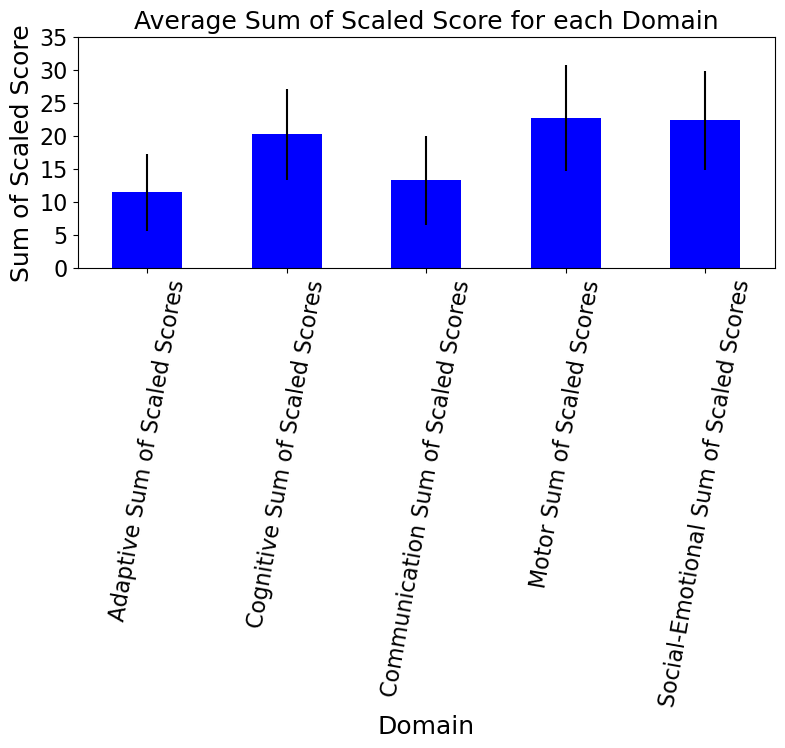

In [37]:
plt.figure(figsize=(9, 3))
p = avg_ss.plot(legend=False,kind="bar",rot=80,color="blue",fontsize=16,yerr=std);
p.set_title("Average Sum of Scaled Score for each Domain", fontsize=18);
p.set_xlabel("Domain", fontsize=18);
p.set_ylabel("Sum of Scaled Score", fontsize=18);
p.set_ylim(0,35);

In [38]:
#This will return the columns with 'SS' in the title
subss_cols = teis_rdi_fixed.columns.str.contains(r'\sSS')

In [39]:
subss_cols

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [40]:
subss_df = teis_rdi_fixed.iloc[:,subss_cols]

In [41]:
subss_df.insert(loc=0, column='Child ID', value=teis_rdi_fixed['Child ID'])

In [42]:
subss_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18708 entries, 0 to 23946
Data columns (total 14 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Child ID                                        18708 non-null  object 
 1   Adaptive-Self Care SS                           18702 non-null  float64
 2   Adaptive-Personal Responsibility SS             9112 non-null   float64
 3   Social Emotional-Adult Interaction SS           18699 non-null  float64
 4   Social Emotional-Peer Interaction SS            9109 non-null   float64
 5   Social Emotional-Self Concept / Social Role SS  18697 non-null  float64
 6   Communication-Receptive Communication SS        18695 non-null  float64
 7   Communication-Expressive Communication SS       18683 non-null  float64
 8   Motor-Gross Motor SS                            18694 non-null  float64
 9   Motor-Fine Motor SS                    

In [43]:
avg_sub = subss_df[subss_df.columns.difference(['Child ID'])].mean()
std_sub = subss_df[subss_df.columns.difference(['Child ID'])].std()
print("Get mean of entire DataFrame:\n", avg_sub)
print("Get standard deviation of entire DataFrame:\n", std_sub)

Get mean of entire DataFrame:
 Adaptive-Personal Responsibility SS                8.019425
Adaptive-Self Care SS                              7.479414
Cognitive-Attention and Memory SS                  8.419600
Cognitive-Perception and Concepts SS               7.821046
Cognitive-Reasoning / Academic Skills SS           8.094203
Communication-Expressive Communication SS          6.506396
Communication-Receptive Communication SS           6.721530
Motor-Fine Motor SS                                9.803756
Motor-Gross Motor SS                               8.650904
Motor-Perceptual Motor SS                          8.556520
Social Emotional-Adult Interaction SS             10.454677
Social Emotional-Peer Interaction SS               7.866396
Social Emotional-Self Concept / Social Role SS     8.061507
dtype: float64
Get standard deviation of entire DataFrame:
 Adaptive-Personal Responsibility SS               3.846831
Adaptive-Self Care SS                             3.138784
Cognitive-A

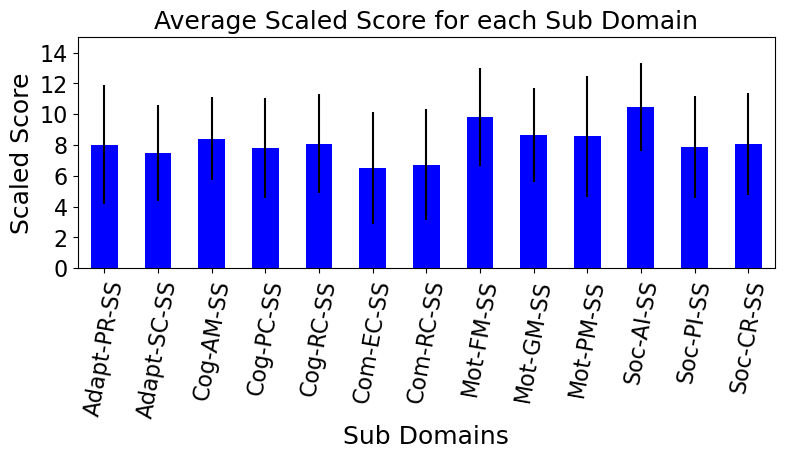

In [44]:
xlab = ['Adapt-PR-SS', 'Adapt-SC-SS', 'Cog-AM-SS','Cog-PC-SS', 'Cog-RC-SS',
        'Com-EC-SS', 'Com-RC-SS', 'Mot-FM-SS', 'Mot-GM-SS', 'Mot-PM-SS', 
        'Soc-AI-SS', 'Soc-PI-SS', 'Soc-CR-SS']
plt.figure(figsize=(9, 3))
p = avg_sub.plot(legend=False,kind="bar",rot=80,color="blue",fontsize=16,yerr=std_sub);
p.set_title("Average Scaled Score for each Sub Domain", fontsize=18);
p.set_xlabel("Sub Domains", fontsize=18);
plt.xticks(ticks = [i for i in range(len(avg_sub))], labels= xlab)
p.set_ylabel("Scaled Score", fontsize=18);
p.set_ylim(0,15);

5. Eligibility is currently based on domains. A child would be considered eligible based on a 40% delay in one area or 25% delay in two areas, as determined by Development Quotient (DQ) scores. A DQ of 70 or less indicates a 40% delay, and a DQ between 71 and 78 indicates a 25% delay. If TEIS added an option for eligibility based on the total score on the BDI-3 total score (DQ score of 70 or less), are there any children who would have qualified that did not qualify based on the current method?

In [47]:
dq_df.insert(loc=0, column='Child ID', value=teis_rdi_fixed['Child ID'])

In [48]:
dq_df

,Child ID,Adaptive Developmental Quotient,Social-Emotional Developmental Quotient,Communication Developmental Quotient,Motor Developmental Quotient,Cognitive Developmental Quotient,BDI-3 Total Developmental Quotient
0,44879,85.0,127.0,91.0,88.0,100.0,99.0
1,47795,88.0,104.0,97.0,102.0,100.0,99.0
2,54340,90.0,91.0,82.0,109.0,83.0,89.0
3,54344,115.0,103.0,88.0,91.0,113.0,101.0
4,54515,75.0,73.0,70.0,73.0,97.0,71.0
...,...,...,...,...,...,...,...
23942,SP03287,115.0,115.0,112.0,118.0,113.0,119.0
23943,SP03288,115.0,116.0,112.0,117.0,122.0,119.0
23944,SP03289,103.0,102.0,55.0,104.0,98.0,94.0
23945,SP03290,88.0,90.0,76.0,100.0,88.0,88.0


In [56]:
print(dq_df.columns)


Index(['Child ID', 'Adaptive Developmental Quotient',
       'Social-Emotional Developmental Quotient',
       'Communication Developmental Quotient', 'Motor Developmental Quotient',
       'Cognitive Developmental Quotient',
       'BDI-3 Total Developmental Quotient'],
      dtype='object')


In [58]:
print(dq_df.dtypes)


Child ID                                    object
Adaptive Developmental Quotient            float64
Social-Emotional Developmental Quotient    float64
Communication Developmental Quotient       float64
Motor Developmental Quotient               float64
Cognitive Developmental Quotient           float64
BDI-3 Total Developmental Quotient         float64
dtype: object


In [59]:
print(dq_df.head())

  Child ID  Adaptive Developmental Quotient  \
0    44879                             85.0   
1    47795                             88.0   
2    54340                             90.0   
3    54344                            115.0   
4    54515                             75.0   

   Social-Emotional Developmental Quotient  \
0                                    127.0   
1                                    104.0   
2                                     91.0   
3                                    103.0   
4                                     73.0   

   Communication Developmental Quotient  Motor Developmental Quotient  \
0                                  91.0                          88.0   
1                                  97.0                         102.0   
2                                  82.0                         109.0   
3                                  88.0                          91.0   
4                                  70.0                          73.0   

 

In [63]:
bdi_qual = dq_df[dq_df['BDI-3 Total Developmental Quotient'] <= 70]
bdi_qual


,Child ID,Adaptive Developmental Quotient,Social-Emotional Developmental Quotient,Communication Developmental Quotient,Motor Developmental Quotient,Cognitive Developmental Quotient,BDI-3 Total Developmental Quotient
12,55497,76.0,80.0,58.0,64.0,68.0,66.0
14,55638,88.0,64.0,46.0,81.0,82.0,69.0
19,404042,46.0,50.0,46.0,42.0,46.0,40.0
31,474967,73.0,92.0,61.0,66.0,70.0,70.0
33,475616,58.0,74.0,52.0,74.0,60.0,61.0
...,...,...,...,...,...,...,...
23919,SP03264,46.0,58.0,46.0,49.0,46.0,43.0
23920,SP03265,70.0,74.0,49.0,76.0,64.0,64.0
23923,SP03268,46.0,74.0,49.0,70.0,70.0,59.0
23924,SP03269,52.0,78.0,52.0,70.0,76.0,64.0


In [65]:
bdi_qual = bdi_qual[bdi_qual['Adaptive Developmental Quotient'] > 70]
bdi_qual = bdi_qual[bdi_qual['Social-Emotional Developmental Quotient'] > 70]
bdi_qual = bdi_qual[bdi_qual['Communication Developmental Quotient'] > 70]
bdi_qual = bdi_qual[bdi_qual['Motor Developmental Quotient'] > 70]
bdi_qual = bdi_qual[bdi_qual['Cognitive Developmental Quotient'] > 70]
bdi_qual

,Child ID,Adaptive Developmental Quotient,Social-Emotional Developmental Quotient,Communication Developmental Quotient,Motor Developmental Quotient,Cognitive Developmental Quotient,BDI-3 Total Developmental Quotient
20116,566224,80.0,79.0,73.0,76.0,77.0,70.0


In [ ]:
eligible_without_bdi = no_bdi_qual['Adaptive Developmental Quotient'] <79) |